In [33]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from collections import Counter
from sklearn.compose import ColumnTransformer


In [34]:
x_train = pd.read_csv("train.csv")
x_test = pd.read_csv("test.csv")
x_test = x_test.drop(columns=['id'])
x_train = x_train.drop(columns=['id'])
x_test = x_test.drop(x_test.columns[0], axis=1)
x_train = x_train.drop(x_train.columns[0], axis=1)
x_train = x_train.dropna()
x_test = x_test.dropna()

In [35]:

x_test,y_test = x_test.drop(['satisfaction'],axis=1),x_test['satisfaction']
y_test = y_test.replace('neutral or dissatisfied',0)
y_test = y_test.replace('satisfied',1)
x_train,y_train = x_train.drop(['satisfaction'],axis=1),x_train['satisfaction']
y_train = y_train.replace('neutral or dissatisfied',0)
y_train = y_train.replace('satisfied',1)

C:\Users\LENOVE\AppData\Local\Temp\ipykernel_25120\1586823674.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test = y_test.replace('satisfied',1)
C:\Users\LENOVE\AppData\Local\Temp\ipykernel_25120\1586823674.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train = y_train.replace('satisfied',1)


In [36]:
categorical_cols = x_train.select_dtypes(include=['object']).columns
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)],
    remainder='passthrough'
)

x_train_encoded = preprocessor.fit_transform(x_train)
x_test_encoded = preprocessor.transform(x_test)


scaler = StandardScaler()
scaler.fit(x_train_encoded)
x_train_encoded_scaler = scaler.transform(x_train_encoded)
x_test_encoded_scaler = scaler.transform(x_test_encoded)

In [ ]:

logistic = LogisticRegression()

param_grid = [
    {
        'penalty': ['l1', 'l2'],
        'C': [0.0001,0.001, 0.01, 0.1, 1.0, 10.0],
        'solver': ['liblinear', 'saga']
    },
    {
        'penalty': ['l2', 'l1'],
        'C': [0.0001,0.001,0.01, 0.1, 1.0, 10.0],
        'class_weight': ['balanced'],
        'solver': ['liblinear', 'saga']
    }
]

grid_search = GridSearchCV(logistic, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_encoded_scaler, y_train)

print("Best params:", grid_search.best_params_)
print("Best estimator:", grid_search.best_estimator_)
print("Best score:", grid_search.best_score_)

In [38]:

model_all_features = LogisticRegression(C=0.01, penalty='l1', solver='saga')

model_all_features.fit(x_train_encoded_scaler, y_train)

y_train_pred = model_all_features.predict(x_train_encoded_scaler)

y_test_pred = model_all_features.predict(x_test_encoded_scaler)

train_accuracy = accuracy_score(y_train, y_train_pred) * 100
test_accuracy = accuracy_score(y_test, y_test_pred) * 100

print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")

Training Accuracy: 87.55%
Test Accuracy: 87.15%


Training set distribution:
 satisfaction
0    58697
1    44897
Name: count, dtype: int64

Test set distribution:
 satisfaction
0    14528
1    11365
Name: count, dtype: int64
Counter({np.int64(0): 14982, np.int64(1): 10911})
Counter({np.int64(0): 60461, np.int64(1): 43133})


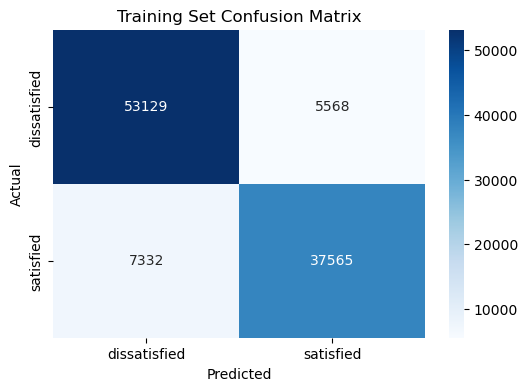

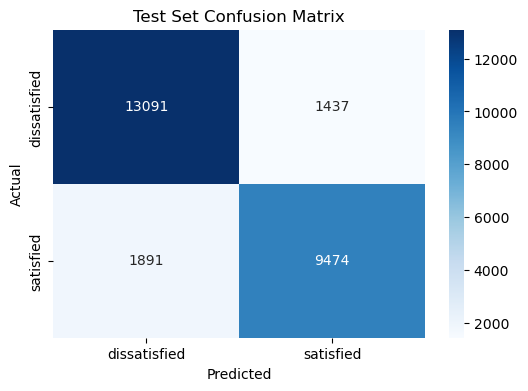


Classification Report (Test Set):
              precision    recall  f1-score   support

dissatisfied       0.87      0.90      0.89     14528
   satisfied       0.87      0.83      0.85     11365

    accuracy                           0.87     25893
   macro avg       0.87      0.87      0.87     25893
weighted avg       0.87      0.87      0.87     25893



In [39]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['dissatisfied', 'satisfied'],
                yticklabels=['dissatisfied', 'satisfied'])
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

print("Training set distribution:\n", y_train.value_counts())
print("\nTest set distribution:\n", y_test.value_counts())
# print("\nTest set distribution:\n", y_test.value_counts())
print( Counter(y_test_pred))
print( Counter(y_train_pred))

plot_confusion_matrix(y_train, y_train_pred, "Training Set Confusion Matrix")
plot_confusion_matrix(y_test, y_test_pred, "Test Set Confusion Matrix")

# Bonus: Classification report
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred,target_names=['dissatisfied', 'satisfied']))